# EDA

In [104]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

import mojimoji

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import gc
gc.enable()

In [105]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

df = pd.concat([train, test], axis=0, sort=False)

df.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587.0
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724.0
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931.0
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553.0
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55069 entries, 0 to 27536
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            55069 non-null  int64  
 1   region        55069 non-null  object 
 2   year          55069 non-null  int64  
 3   manufacturer  55069 non-null  object 
 4   condition     55069 non-null  object 
 5   cylinders     55069 non-null  object 
 6   fuel          52335 non-null  object 
 7   odometer      55069 non-null  int64  
 8   title_status  54384 non-null  object 
 9   transmission  55069 non-null  object 
 10  drive         55069 non-null  object 
 11  size          55069 non-null  object 
 12  type          54384 non-null  object 
 13  paint_color   55069 non-null  object 
 14  state         48736 non-null  object 
 15  price         27532 non-null  float64
dtypes: float64(1), int64(3), object(12)
memory usage: 7.1+ MB


In [107]:
lost_values = df.isna().sum()
lost_values[lost_values > 0]

fuel             2734
title_status      685
type              685
state            6333
price           27537
dtype: int64

## region

ユニーク数が300近くあるので、onehotは適さないかも

自然言語を用いたアプローチを考えるべき？

In [108]:
df["region"].value_counts()

region
central NJ                    2166
rhode island                  1435
rochester                     1053
albany                        1034
washington, DC                 961
las vegas                      895
tampa bay area                 833
los angeles                    803
richmond                       685
dallas / fort worth            646
pittsburgh                     627
new york city                  626
tucson                         571
philadelphia                   561
north jersey                   530
detroit metro                  521
albuquerque                    502
syracuse                       501
stockton                       500
denver                         497
phoenix                        490
baltimore                      470
wichita                        470
madison                        466
south jersey                   463
south florida                  457
bakersfield                    446
knoxville                      446
san diego    

## year

minは1918
maxは2022
よって基準年は2023年と仮定できる

yearの異常値は四桁目を間違えたtypoの可能性が高い
->2030以上は1000引く

ageは古くなると逆に価値が上がる。conditionと踏まえた特徴量を作るといいかも

In [109]:
df[df["year"] < 2030]["year"].describe()

count    55062.000000
mean      2007.708274
std         10.097083
min       1918.000000
25%       2005.000000
50%       2011.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

In [110]:
df[df["year"] >= 2030]["year"].value_counts()

year
3015    2
2999    1
3008    1
3017    1
3019    1
3011    1
Name: count, dtype: int64

In [111]:
df.loc[df["year"] >= 2030, "year"] = df[df["year"] >= 2030]["year"] - 1000

<Axes: xlabel='year', ylabel='Count'>

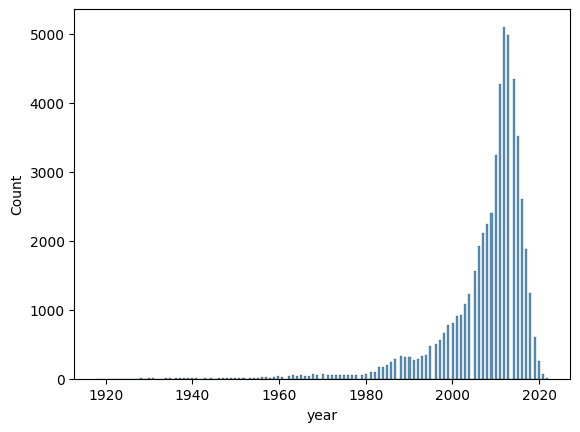

In [112]:
sns.histplot(df["year"])

<Axes: xlabel='age', ylabel='price'>

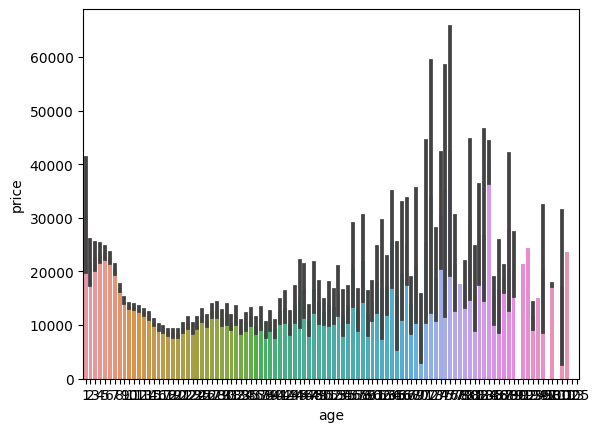

In [113]:
df["age"] = 2023 - df["year"]

sns.barplot(x="age", y="price", data=df)

## manufacturer

サンプル数が少ないものもあるので、otherとかにしたほうがいいかも

In [114]:
df["manufacturer"].value_counts()

manufacturer
ford             12335
chevrolet         6655
bmw               5601
honda             3134
toyota            3125
ram               2883
jeep              2294
nissan            1800
volkswagen        1377
FORD              1349
buick             1198
kia               1180
dodge              793
CHEVROLET          777
audi               626
gmc                621
hyundai            617
BMW                545
mazda              540
subaru             494
chrysler           451
acura              414
HONDA              396
cadillac           349
TOYOTA             346
lexus              339
mitsubishi         328
RAM                325
mercedes-benz      301
lincoln            297
pontiac            274
mercury            257
JEEP               244
ｆｏｒｄ               188
NISSAN             185
infiniti           163
VOLKSWAGEN         147
KIA                141
BUICK              129
ｃｈｅｖｒｏｌｅｔ          123
volvo              112
DODGE               87
HYUNDAI             8

In [115]:
df["manufacturer"] = df["manufacturer"].apply(lambda x: mojimoji.zen_to_han(x))
df["manufacturer"] = df["manufacturer"].apply(lambda x: x.lower())

In [116]:
df["manufacturer"].value_counts()

manufacturer
ford             13890
chevrolet         7566
bmw               6223
honda             3573
toyota            3528
ram               3245
jeep              2570
nissan            2017
volkswagen        1542
kia               1347
buick             1343
dodge              890
hyundai            720
gmc                694
audi               689
mazda              606
subaru             559
chrysler           502
acura              469
cadillac           399
lexus              381
mitsubishi         361
mercedes-benz      350
lincoln            322
mercury            295
pontiac            294
infiniti           189
volvo              127
saturn              94
mini                81
fiat                78
rover               45
jaguar              22
porsche             20
alfa-romeo           6
lexuѕ                4
nisѕan               4
vоlkswagen           3
toyotа               3
land rover           3
subαru               3
aston-martin         3
niѕsan               

<Axes: xlabel='manufacturer', ylabel='price'>

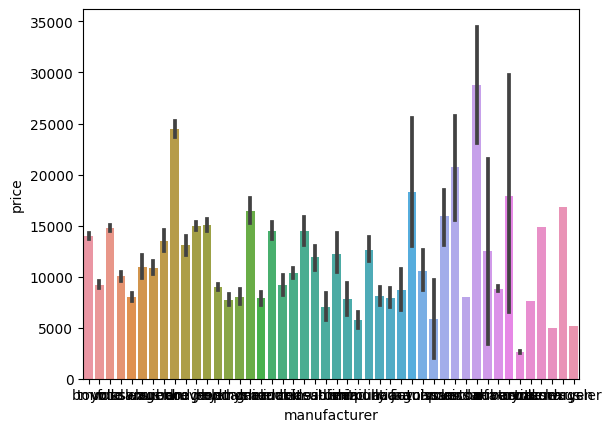

In [117]:
sns.barplot(x="manufacturer", y="price", data=df)

## condition
これはlabelencodingでいけそう

New
Like new
Excellent
Good
Salvage
Fair

In [118]:
df["condition"].value_counts()

condition
excellent    30440
good         12020
like new      7647
fair          4773
new            116
salvage         73
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='price'>

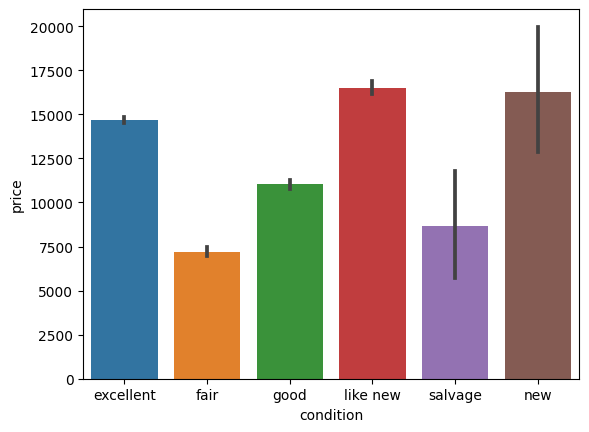

In [119]:
sns.barplot(x="condition", y="price", data=df)

## cyclinders

現在の軽自動車は3気筒、乗用車では4〜8気筒が主流となっていますが、大型車やスポーツカーでは気筒数が多く、排気量も大きくなります。

In [120]:
df["cylinders"].value_counts()

cylinders
6 cylinders     23201
4 cylinders     20069
8 cylinders     11340
other             149
10 cylinders      117
5 cylinders       107
3 cylinders        55
12 cylinders       31
Name: count, dtype: int64

In [121]:
df["cylinders"].replace("other", "0 cylinders", inplace=True)

pattern = r"(\d+)"
df["cylinders"] = df["cylinders"].str.extract(pattern, expand=False).astype(float)

<Axes: xlabel='cylinders', ylabel='price'>

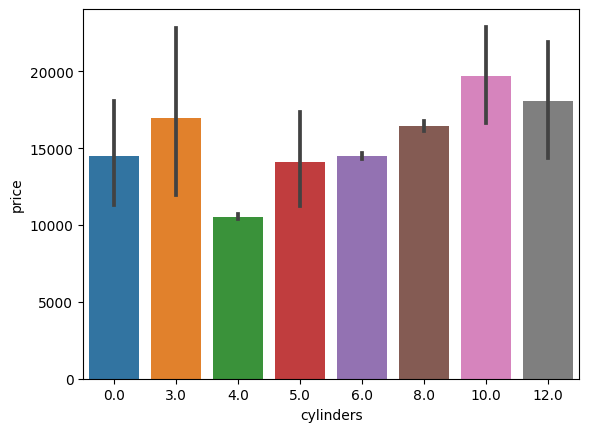

In [122]:
sns.barplot(x="cylinders", y="price", data=df)

## fuel

In [123]:
df["fuel"].value_counts()

fuel
gas         46973
diesel       5154
hybrid        144
other          39
electric       25
Name: count, dtype: int64

<Axes: xlabel='fuel', ylabel='price'>

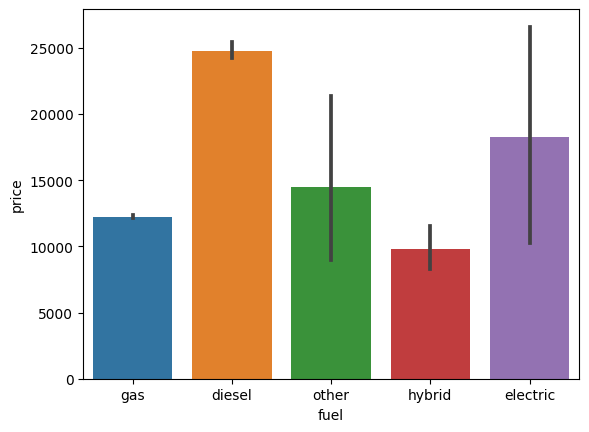

In [124]:
sns.barplot(x="fuel", y="price", data=df)

# odometer

In [125]:
df.loc[df["odometer"] == -1, "odometer"] = np.nan
df.loc[df["odometer"] == -131869, "odometer"] = 131869

In [126]:
df["odometer"].describe()

count    5.468100e+04
mean     1.171364e+05
std      6.126514e+04
min      1.000000e+01
25%      8.000600e+04
50%      1.124070e+05
75%      1.509460e+05
max      2.946000e+06
Name: odometer, dtype: float64

<Axes: xlabel='odometer', ylabel='Count'>

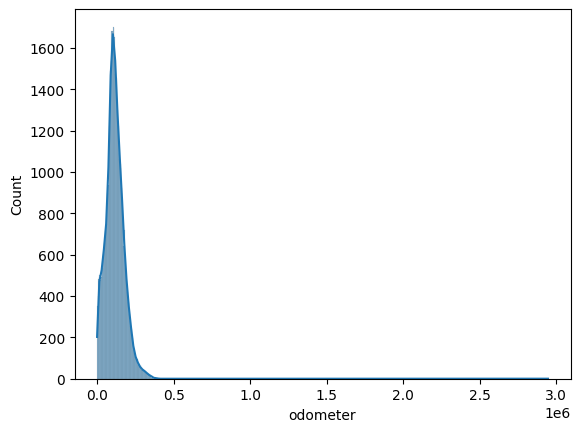

In [127]:
sns.histplot(df["odometer"], kde=True)

## title_status

In [128]:
df["title_status"].value_counts()

title_status
clean         45081
rebuilt        5963
salvage        1923
lien            885
parts only      290
missing         242
Name: count, dtype: int64

<Axes: xlabel='title_status', ylabel='price'>

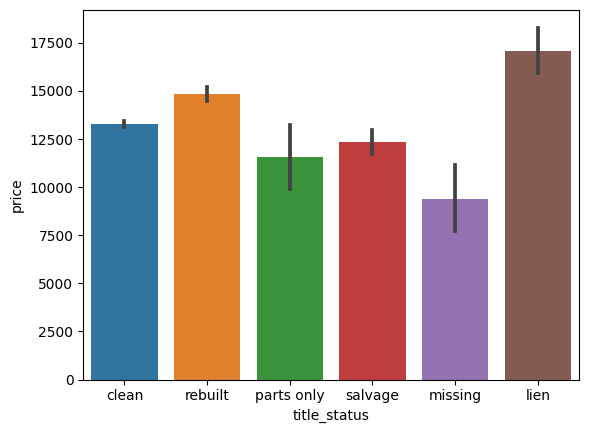

In [129]:
sns.barplot(x="title_status", y="price", data=df)

## transmission

In [130]:
df["transmission"].value_counts()

transmission
automatic    40990
manual       12332
other         1747
Name: count, dtype: int64

<Axes: xlabel='transmission', ylabel='price'>

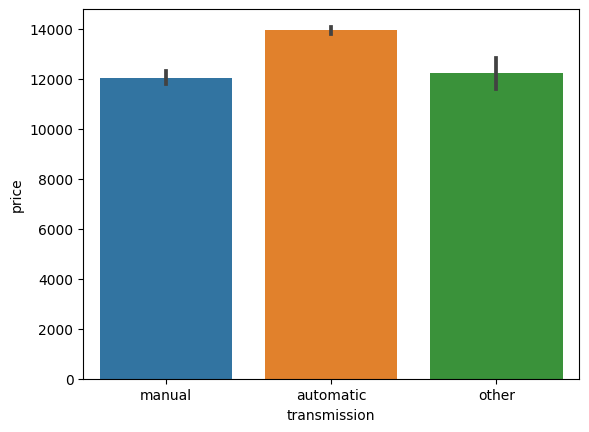

In [131]:
sns.barplot(x="transmission", y="price", data=df)

## drive

In [132]:
df["drive"].value_counts()

drive
fwd    29213
4wd    16102
rwd     9754
Name: count, dtype: int64

<Axes: xlabel='drive', ylabel='price'>

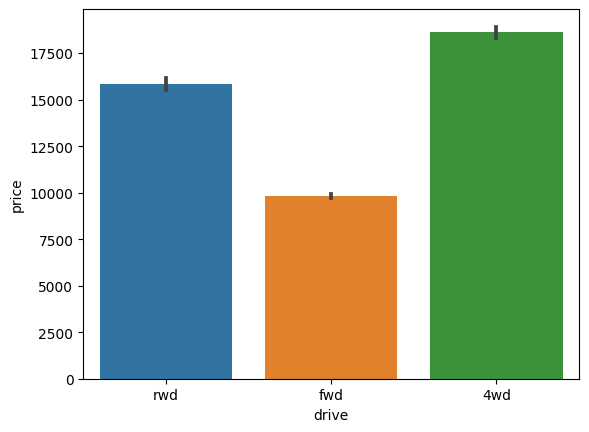

In [133]:
sns.barplot(x="drive", y="price", data=df)

## size

In [142]:
df["size"] = df["size"].str.replace("−", "-")
df["size"] = df["size"].str.replace("ー", "-")

In [143]:
df["size"].value_counts()

size
full-size      29356
mid-size       18782
compact         6649
sub-compact      282
Name: count, dtype: int64

## type

In [144]:
df["type"].value_counts()

type
sedan          18735
SUV            14566
truck           7625
coupe           4589
pickup          4249
hatchback       1334
van             1080
convertible      879
mini-van         474
wagon            412
other            251
offroad          155
bus               35
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='price'>

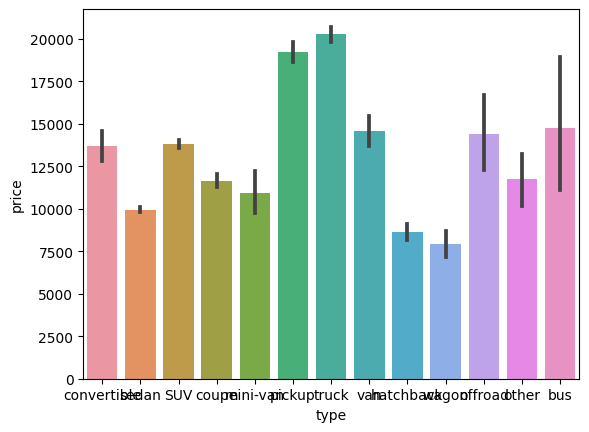

In [145]:
sns.barplot(x="type", y="price", data=df)

## paint_color

In [146]:
df["paint_color"].value_counts()

paint_color
black     20224
silver     8669
blue       7623
white      7263
green      4670
red        2832
grey       2256
brown       752
custom      399
orange      269
yellow       64
purple       48
Name: count, dtype: int64

<Axes: xlabel='paint_color', ylabel='price'>

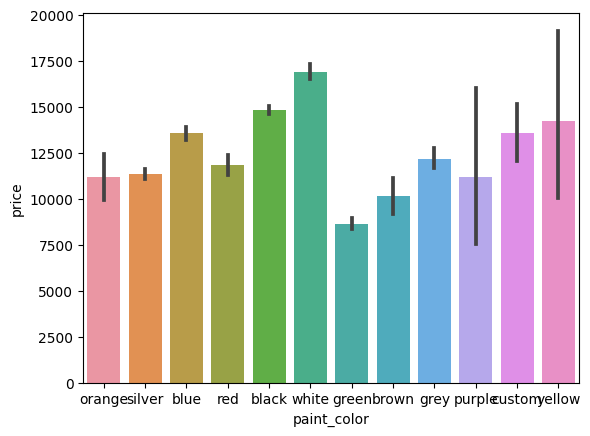

In [147]:
sns.barplot(x="paint_color", y="price", data=df)

## state

In [148]:
df["state"].value_counts()

state
ca    5341
ny    3801
fl    3301
nj    2892
tx    2479
pa    1975
oh    1680
mi    1558
va    1482
az    1425
co    1383
nc    1285
ri    1284
wi    1185
or    1184
tn    1110
mn    1055
id     868
dc     860
ma     818
il     794
nv     788
ia     755
in     692
wa     666
nm     585
ct     566
mo     551
ok     529
mt     528
ks     527
ga     524
md     524
sc     507
ky     437
al     334
vt     295
hi     241
ne     230
ut     213
de     202
ak     191
nd     189
nh     175
la     172
sd     161
me     139
ar      90
wv      72
wy      47
ms      46
Name: count, dtype: int64

<Axes: xlabel='state', ylabel='price'>

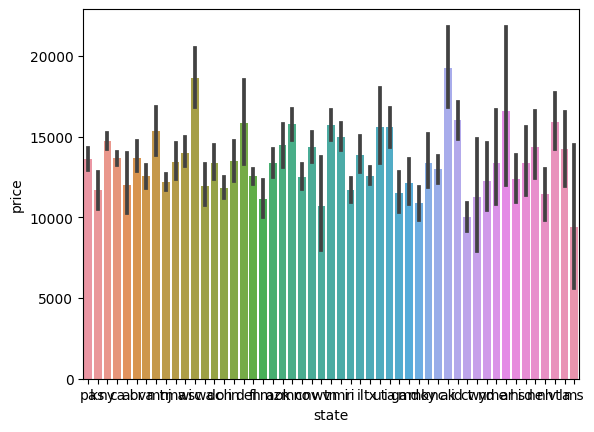

In [151]:
sns.barplot(x="state", y="price", data=df)

## price

<Axes: xlabel='price', ylabel='Count'>

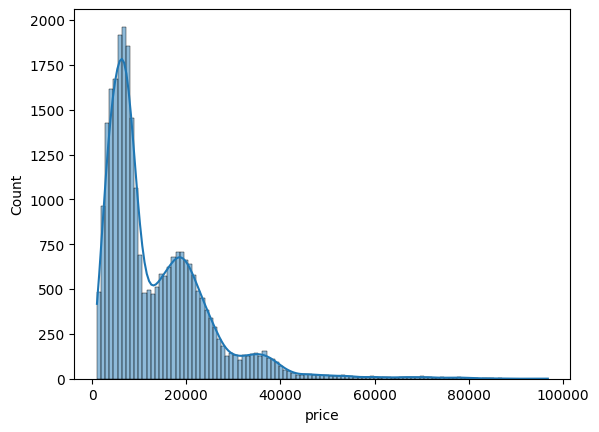

In [152]:
sns.histplot(df["price"], kde=True)